<a href="https://colab.research.google.com/github/MarshaKamsteeg/TM10007_Machine_Learning_Group_Assignment/blob/main/tm10007_group_9_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment

In [2]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/karinvangarderen/tm10007_project.git

## Description of data set
Import data from the ADNI dataset. Find empty values if present. 

In [3]:
# Import Data
from adni.load_data import load_data
import numpy as np
import pandas as pd

# Import Data
data = load_data()
data_pandas = pd.DataFrame(data)
print(f'Total number of samples: {len(data.index)}')
print(f'Total number of columns: {len(data.columns)}')
print(f'Total amount of features: {len(data.columns)-2}')

# Find empty / NaN entry in pandas dataframe
data_pandas = data_pandas.replace(' ', np.nan) 
empty_values = np.where(pd.isnull(data_pandas))

if ~empty_values[0] == []:
  print(f'Empty values can be found at index {empty_values}')
else:
  print('There are no empty values found.')
  pass

# Percentage AD and CN
number_AD = data_pandas['label'].value_counts()['AD']
number_CN = data_pandas['label'].value_counts()['CN']
print(f"Within the dataset {number_AD} samples are from people with Alzheimer Disease")
print(f"The other {number_CN} samples are from people without Alzheimer Disease") 


Total number of samples: 855
Total number of columns: 268
Total amount of features: 266
There are no empty values found.
Within the dataset 519 samples are from people with Alzheimer Disease
The other 336 samples are from people without Alzheimer Disease


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


# Preprocessing of the data

## Dividing data in a designset (80%) and testset (20%)

In [4]:
# import modules
from sklearn.model_selection import train_test_split

# Divide data in label and feature set 
labels = data['label']
features = data.drop(columns=['label'])

# Divide data in trainingsset (80%) and testset (20%) stratified for the label
data_designset, data_testset, label_designset, label_testset = train_test_split(features, labels, test_size=.2, random_state=1, stratify=data['label'])

# Check the stratification 
percent_AD_train = (label_designset.value_counts()['AD'])/len(label_designset)*100
percent_CN_train = (label_designset.value_counts()['CN'])/len(label_designset)*100
percent_AD_test = (label_testset.value_counts()['AD'])/len(label_testset)*100
percent_CN_test = (label_testset.value_counts()['CN'])/len(label_testset)*100

print(f"{percent_AD_train:.2f}% of the train data are Alzheimer disease samples.")
print(f"{percent_CN_train:.2f}% of the train data are control samples.")
print(f"{percent_AD_test:.2f}% of the test data are Alzheimer disease samples.")
print(f"{percent_CN_test:.2f}% of the test data are control samples.")


60.67% of the train data are Alzheimer disease samples.
39.33% of the train data are control samples.
60.82% of the test data are Alzheimer disease samples.
39.18% of the test data are control samples.


## Feature Dropping

Find columns where > 90% of the column has value zero. Remove the features if this is true. Besides, remove features if the whole column has one unique value. 

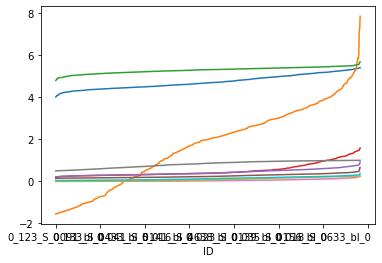

In [5]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

data_designset = data_designset.drop(columns=data_designset.columns[data_designset.eq(0).mean()>0.9])
data_designset = data_designset[data_designset.columns[data_designset.nunique() > 1]]
data_designset_feature_names = data_designset.columns

scaling_check = data_designset['hf_entropy'].sort_values()
scaling_check.plot()
scaling_check_2 = data_designset['hf_kurtosis'].sort_values()
scaling_check_2.plot()
scaling_check_3 = data_designset['tf_LBP_std_R3_P12'].sort_values()
scaling_check_3.plot()
scaling_check_4 = data_designset['hf_quartile_range'].sort_values()
scaling_check_4.plot()
scaling_check_5 = data_designset['hf_std'].sort_values()
scaling_check_5.plot()
scaling_check_6 = data_designset['tf_GLRLM_ShortRunEmphasis'].sort_values()
scaling_check_6.plot()
scaling_check_7 = data_designset['tf_NGTDM_Complexity'].sort_values()
scaling_check_7.plot()
scaling_check_8 = data_designset['tf_GLRLM_GrayLevelNonUniformityNormalized'].sort_values()
scaling_check_8.plot()
scaling_check_9 = data_designset['tf_GLRLM_GrayLevelVariance'].sort_values()
scaling_check_9.plot()
scaling_check_10 = data_designset['tf_GLRLM_ShortRunLowGrayLevelEmphasis'].sort_values()
scaling_check_10.plot()

# Eventueel verwijderen als meer dan 90% hetzelfde is. 
# Toevoegen welke kolom die verwijdert.

## Scaling

In [6]:
# Different methods for feature scaling. Decision will be made after usage of PCA
# Import modules
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# # Robust scaler - based on percentiles. Not influenced by a few number of very large marginal outliers
# trans = RobustScaler()
# x_train_robust = trans.fit_transform(x_train)

# # Standard scaler - removes the mean and scales the data to unit variance
# scaler = StandardScaler()
# x_train_scaler = scaler.fit_transform(x_train)

# MinMax scaler - rescales data set such that all feature values are in range [0,1]
norm = MinMaxScaler().fit(data_designset)
data_designset_norm = norm.transform(data_designset)
data_designset_norm = pd.DataFrame(data_designset_norm)
data_designset_norm.columns = data_designset_feature_names


# Cross validation
First a stratified k fold cross validation is used with 10 splits. 
Feature selection - best method to select features from this multi feature space. The options looked in to are:
1. Univariate
2. Univariate + PCA
3. PCA

Classifier - best classifier with the remaining features. Three classifiers are looked in to based on literature review.
1. K-NN (normalized scaler)
2. SVM 
3. CNN

# Univariate optimalisatie beide

Best classifier: k=23
0.876984126984127
Best classifier: k=23
0.7888007054673721
Best classifier: k=23
0.8977072310405643
Best classifier: k=21
0.8756613756613757
Best classifier: k=21
0.8597883597883599
Best classifier: k=21
0.9091710758377425
Best classifier: k=25
0.8276014109347444
Best classifier: k=25
0.8677248677248677
Best classifier: k=25
0.8783068783068783
Best classifier: k=17
0.8686067019400352
The optimal N=23
Best classifier: k=21
0.8994708994708995
Best classifier: k=25
0.808641975308642
Best classifier: k=25
0.9100529100529101
Best classifier: k=21
0.8743386243386244
Best classifier: k=23
0.8778659611992945
Best classifier: k=25
0.9435626102292769
Best classifier: k=25
0.8461199294532629
Best classifier: k=23
0.8699294532627866
Best classifier: k=25
0.9223985890652557
Best classifier: k=19
0.8765432098765432
The optimal N=24
Best classifier: k=25
0.8818342151675486
Best classifier: k=25
0.8064373897707231
Best classifier: k=17
0.9043209876543209
Best classifier: k=25
0.8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:143: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


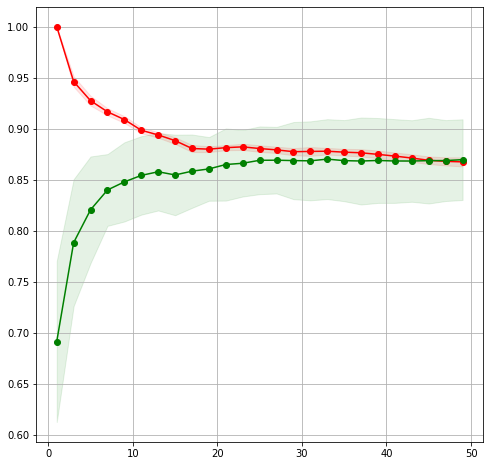

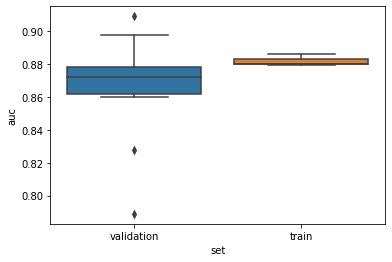

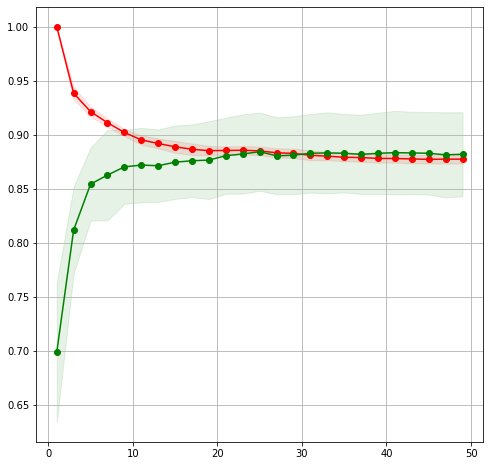

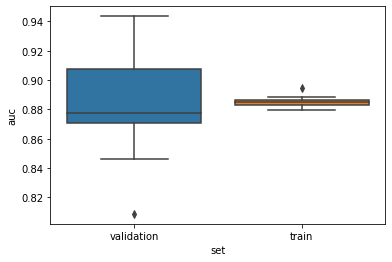

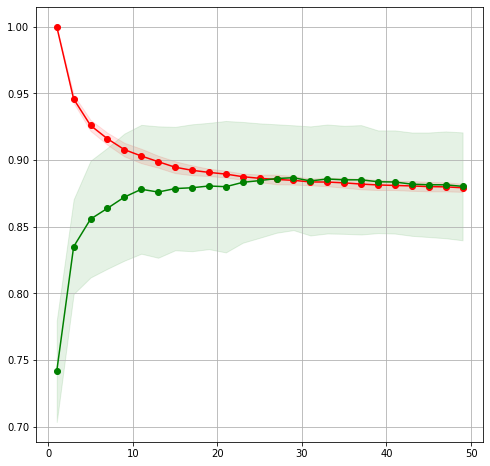

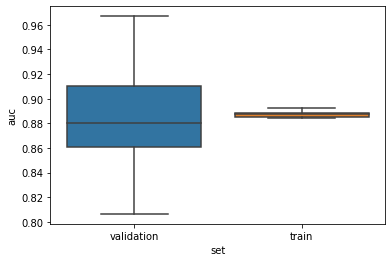

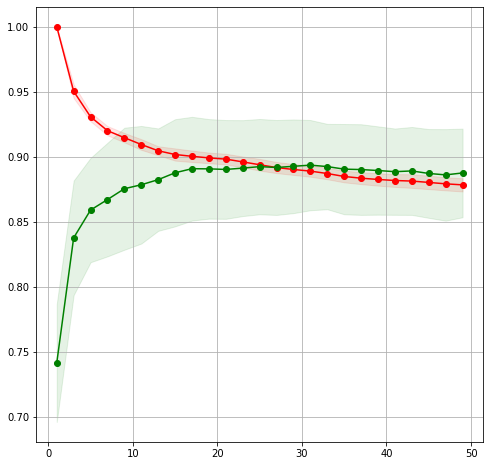

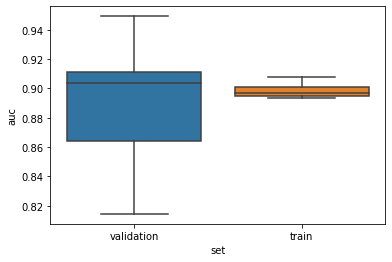

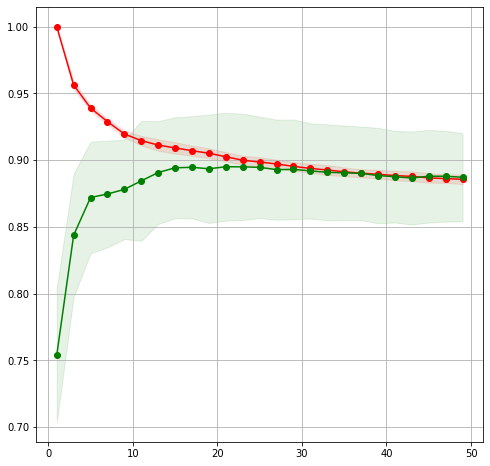

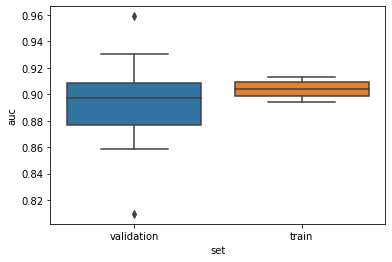

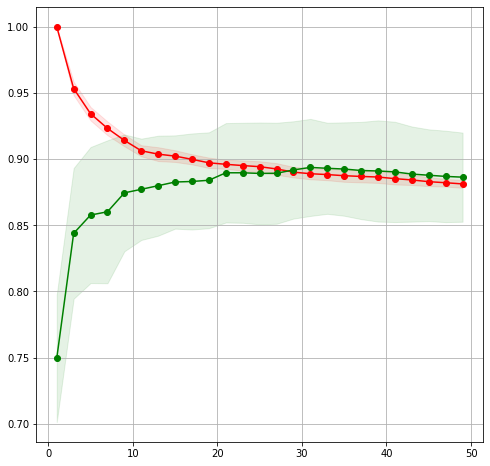

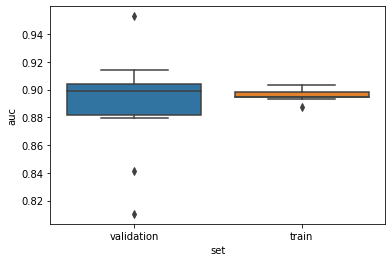

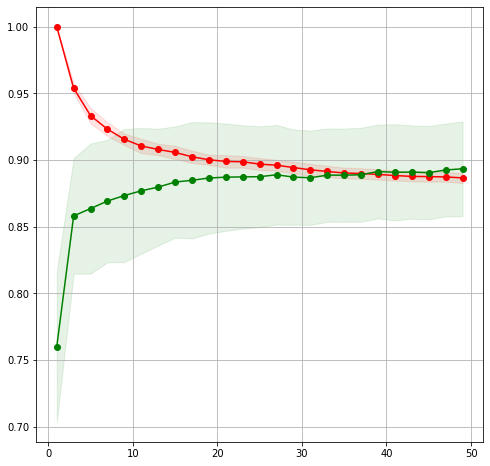

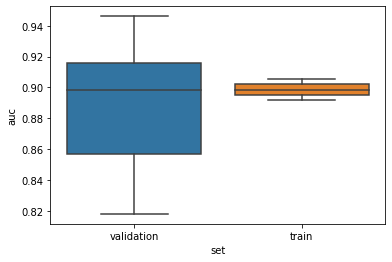

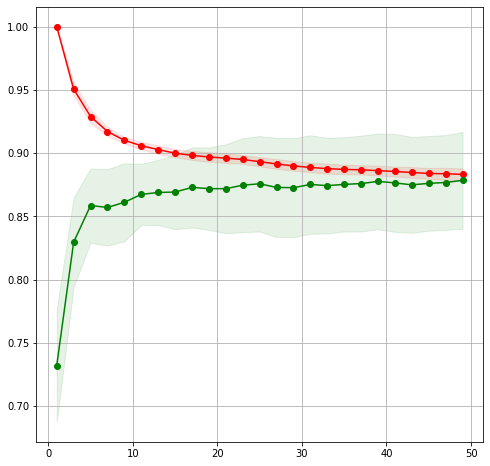

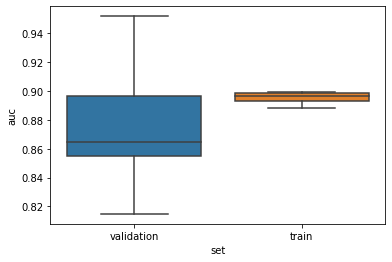

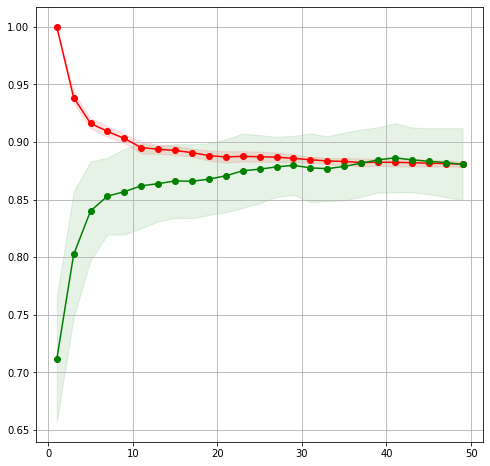

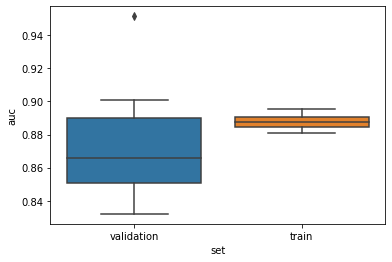

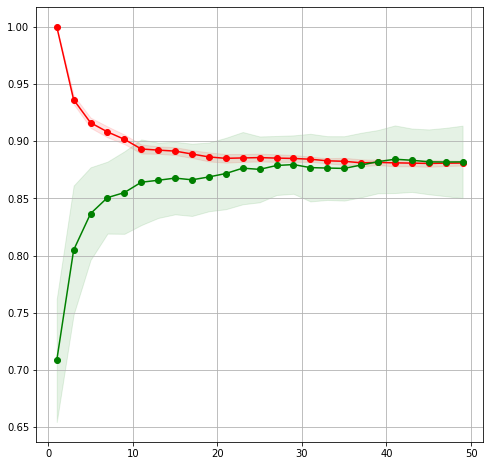

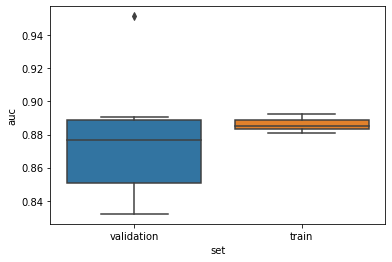

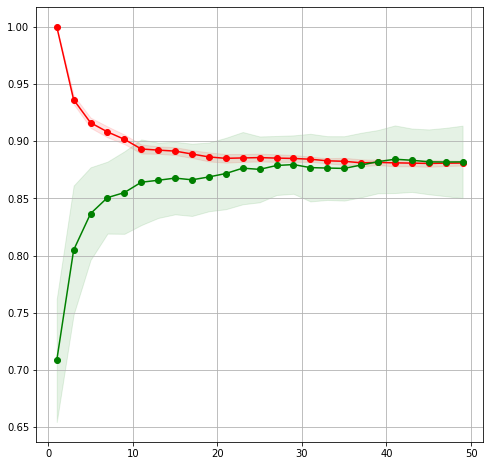

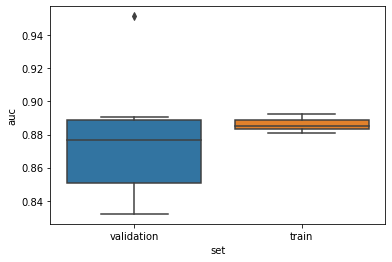

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import neighbors, metrics
import seaborn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import math
from tabulate import tabulate

# configure the cross-validation procedure. A 10 fold split is used stratified for the label. 
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.1, random_state=1)
k_list = list(range(1, 50, 2))

threshold = []
mean_auc_val = []
std_auc_val = []
optimal_k = []

thresholds = np.linspace(0,1,11)
for threshold_feature_relative in thresholds:
  all_train = []
  all_val = []
  results = []
  best_n_neighbors = []


  for train_idx, val_idx in sss.split(data_designset_norm,label_designset): # split data
    x_train, x_val = data_designset_norm.to_numpy()[train_idx], data_designset_norm.to_numpy()[val_idx]
    y_train, y_val = label_designset.to_numpy()[train_idx], label_designset.to_numpy()[val_idx]

    train_scores = []
    val_scores = []

    # Feature selection using univariate statistical testing. An one-way ANOVA is used and the features are scored. 
    bestfeatures = SelectKBest(score_func=f_classif, k=len(data_designset_norm.columns))
    fit = bestfeatures.fit(x_train, y_train)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(data_designset_norm.columns)


    feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
    feature_scores.columns = ['Specs','Score']  
    feature_scores = feature_scores.sort_values('Score')
    highest_feature_score = feature_scores['Score'].iloc[-1]
    # threshold_feature_relative = 0.5                                                 # Optimization of parameter is needed
    threshold_feature_score = threshold_feature_relative*highest_feature_score

    # Every feature scoring above the threshold will be selected. 
    feature_selection_names = []
    for i in range(0,len(feature_scores['Score'])):
      if feature_scores['Score'].iloc[i]>=threshold_feature_score:
        feature_selection_names.append(feature_scores['Specs'].iloc[i])

    selected_data_univ_designset_norm = data_designset_norm[feature_selection_names]
    selected_data_univ_trainset_norm = selected_data_univ_designset_norm.to_numpy()[train_idx]
    selected_data_univ_valset_norm = selected_data_univ_designset_norm.to_numpy()[val_idx]
    
    # Aplly K-Nearest Neighbor classifier to features selected with univariate
    for k in k_list: 
      clf_knn = neighbors.KNeighborsClassifier(n_neighbors=k)
      clf_knn.fit(selected_data_univ_trainset_norm, y_train)

      # Test the classifier on the selected features from the training data and plot 
      train_proba = clf_knn.predict_proba(selected_data_univ_trainset_norm)[:,1]
      val_proba = clf_knn.predict_proba(selected_data_univ_valset_norm)[:,1]

      score_train = metrics.roc_auc_score(y_train, train_proba)
      score_val = metrics.roc_auc_score(y_val, val_proba)

      train_scores.append(score_train)
      val_scores.append(score_val)

    all_train.append(train_scores)
    all_val.append(val_scores)

    # Create a grid search to find the optimal k using a gridsearch and 10-fold cross validation
    # Same as above
    parameters = {"n_neighbors": list(range(1, 26, 2))}
    knn = neighbors.KNeighborsClassifier()
    cv_10fold = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(knn, parameters, cv=cv_10fold, scoring='roc_auc')
    grid_search.fit(selected_data_univ_trainset_norm, y_train)
    
    # Get resulting classifier
    clf = grid_search.best_estimator_
    print(f'Best classifier: k={clf.n_neighbors}')
    best_n_neighbors.append(clf.n_neighbors)
    
    # Test the classifier on the test data
    probabilities = clf.predict_proba(selected_data_univ_valset_norm)
    scores = probabilities[:, 1]
    
    # Get the auc
    auc = metrics.roc_auc_score(y_val, scores)
    results.append({
        'auc': auc,
        'k': clf.n_neighbors,
        'set': 'validation'
    })
    print(auc)
    
    # Test the classifier on the validation data
    probabilities_train = clf.predict_proba(selected_data_univ_trainset_norm)
    scores_train = probabilities_train[:, 1]
    
    # Get the auc
    auc_train = metrics.roc_auc_score(y_train, scores_train)
    results.append({
        'auc': auc_train,
        'k': clf.n_neighbors,
        'set': 'train'
    })
    
  # Calculate the mean and std
  all_train = np.array(all_train)
  all_val = np.array(all_val)

  train_scores_mean = all_train.mean(axis=0)
  val_scores_mean = all_val.mean(axis=0)

  train_scores_std = all_train.std(axis=0)
  val_scores_std = all_val.std(axis=0)

  # Plot the mean scores and the std as shading
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)
  ax.grid()
  ax.fill_between(k_list, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
  ax.fill_between(k_list, val_scores_mean - val_scores_std,
                      val_scores_mean + val_scores_std, alpha=0.1,
                      color="g")
  ax.plot(k_list, train_scores_mean, 'o-', color="r",
          label="Training score")
  ax.plot(k_list, val_scores_mean, 'o-', color="g",
          label="Validation score")
  
  # Create results dataframe and plot it
  plt.figure()
  results = pd.DataFrame(results)
  seaborn.boxplot(y='auc', x='set', data=results)

  auc_val = results[results['set'].str.contains('validation')]
  threshold.append(threshold_feature_relative)
  mean_auc_val.append(auc_val['auc'].mean())
  std_auc_val.append(auc_val['auc'].std())
  optimal_k.append(int(np.median(best_n_neighbors)))

  optimal_n = int(np.median(best_n_neighbors))
  print(f"The optimal N={optimal_n}")

auc_table = {'Threshold': threshold, 'Mean AUC': mean_auc_val, 'Standard deviation AUC': std_auc_val, 'Optimal k': optimal_k}
print(tabulate(auc_table, headers='keys', tablefmt='fancy_grid'))


# Univariate waar we al optimale threshold van 0.5

Best classifier: k=21
Best classifier: k=19
Best classifier: k=21
Best classifier: k=19
Best classifier: k=23
Best classifier: k=23
Best classifier: k=21
Best classifier: k=23
Best classifier: k=23
Best classifier: k=19
The optimal N=21


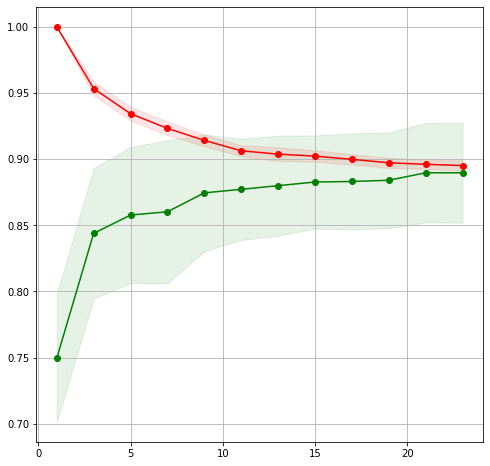

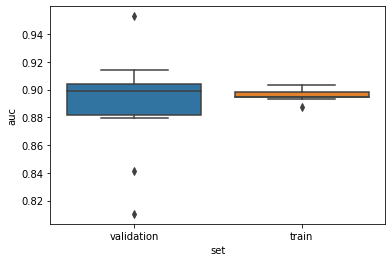

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import neighbors, metrics
import seaborn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import math

# configure the cross-validation procedure. A 10 fold split is used stratified for the label. 
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.1, random_state=1)
k_list = list(range(1, 25, 2))

all_train = []
all_val = []
results = []
best_n_neighbors = []

for train_idx, val_idx in sss.split(data_designset_norm,label_designset): # split data
  x_train, x_val = data_designset_norm.to_numpy()[train_idx], data_designset_norm.to_numpy()[val_idx]
  y_train, y_val = label_designset.to_numpy()[train_idx], label_designset.to_numpy()[val_idx]

  train_scores = []
  val_scores = []

  # Feature selection using univariate statistical testing. An one-way ANOVA is used and the features are scored. 
  bestfeatures = SelectKBest(score_func=f_classif, k=len(data_designset_norm.columns))
  fit = bestfeatures.fit(x_train, y_train)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(data_designset_norm.columns)

  # A threshold is set on 0.5 times the maximum scoring feature.
  feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
  feature_scores.columns = ['Specs','Score']  
  feature_scores = feature_scores.sort_values('Score')
  highest_feature_score = feature_scores['Score'].iloc[-1]
  threshold_feature_relative = 0.5                                                 # Optimization of parameter is needed
  threshold_feature_score = threshold_feature_relative*highest_feature_score

  # Every feature scoring above the threshold will be selected. 
  feature_selection_names = []
  for i in range(0,len(feature_scores['Score'])):
    if feature_scores['Score'].iloc[i]>=threshold_feature_score:
      feature_selection_names.append(feature_scores['Specs'].iloc[i])

  selected_data_designset_norm = data_designset_norm[feature_selection_names]
  selected_data_trainset_norm = selected_data_designset_norm.to_numpy()[train_idx]
  selected_data_valset_norm = selected_data_designset_norm.to_numpy()[val_idx]
  
  for k in k_list: 
    clf_knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf_knn.fit(selected_data_trainset_norm, y_train)

    # Test the classifier on the selected features from the training data and plot 
    train_proba = clf_knn.predict_proba(selected_data_trainset_norm)[:,1]
    val_proba = clf_knn.predict_proba(selected_data_valset_norm)[:,1]

    score_train = metrics.roc_auc_score(y_train, train_proba)
    score_val = metrics.roc_auc_score(y_val, val_proba)

    train_scores.append(score_train)
    val_scores.append(score_val)

  all_train.append(train_scores)
  all_val.append(val_scores)

  # Create a grid search to find the optimal k using a gridsearch and 10-fold cross validation
  # Same as above
  parameters = {"n_neighbors": list(range(1, 26, 2))}
  knn = neighbors.KNeighborsClassifier()
  cv_10fold = StratifiedKFold(n_splits=10)
  grid_search = GridSearchCV(knn, parameters, cv=cv_10fold, scoring='roc_auc')
  grid_search.fit(selected_data_trainset_norm, y_train)
  
  # Get resulting classifier
  clf = grid_search.best_estimator_
  print(f'Best classifier: k={clf.n_neighbors}')
  best_n_neighbors.append(clf.n_neighbors)
  
  # Test the classifier on the test data
  probabilities = clf.predict_proba(selected_data_valset_norm)
  scores = probabilities[:, 1]
  
  # Get the auc
  auc = metrics.roc_auc_score(y_val, scores)
  results.append({
      'auc': auc,
      'k': clf.n_neighbors,
      'set': 'validation'
  })
  
  # Test the classifier on the validation data
  probabilities_train = clf.predict_proba(selected_data_trainset_norm)
  scores_train = probabilities_train[:, 1]
  
  # Get the auc
  auc_train = metrics.roc_auc_score(y_train, scores_train)
  results.append({
      'auc': auc_train,
      'k': clf.n_neighbors,
      'set': 'train'
  })

# Calculate the mean and std of the accuracy
all_train = np.array(all_train)
all_val = np.array(all_val)

train_scores_mean = all_train.mean(axis=0)
val_scores_mean = all_val.mean(axis=0)

train_scores_std = all_train.std(axis=0)
val_scores_std = all_val.std(axis=0)

# Plot the mean scores and the std as shading
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.grid()
ax.fill_between(k_list, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
ax.fill_between(k_list, val_scores_mean - val_scores_std,
                    val_scores_mean + val_scores_std, alpha=0.1,
                    color="g")
ax.plot(k_list, train_scores_mean, 'o-', color="r",
        label="Training score")
ax.plot(k_list, val_scores_mean, 'o-', color="g",
        label="Validation score")

# Create results dataframe and plot it
plt.figure()
results = pd.DataFrame(results)
seaborn.boxplot(y='auc', x='set', data=results)

optimal_n = int(np.median(best_n_neighbors))
print(f"The optimal N={optimal_n}")
  

### Univariate Feature Selection - BASIS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


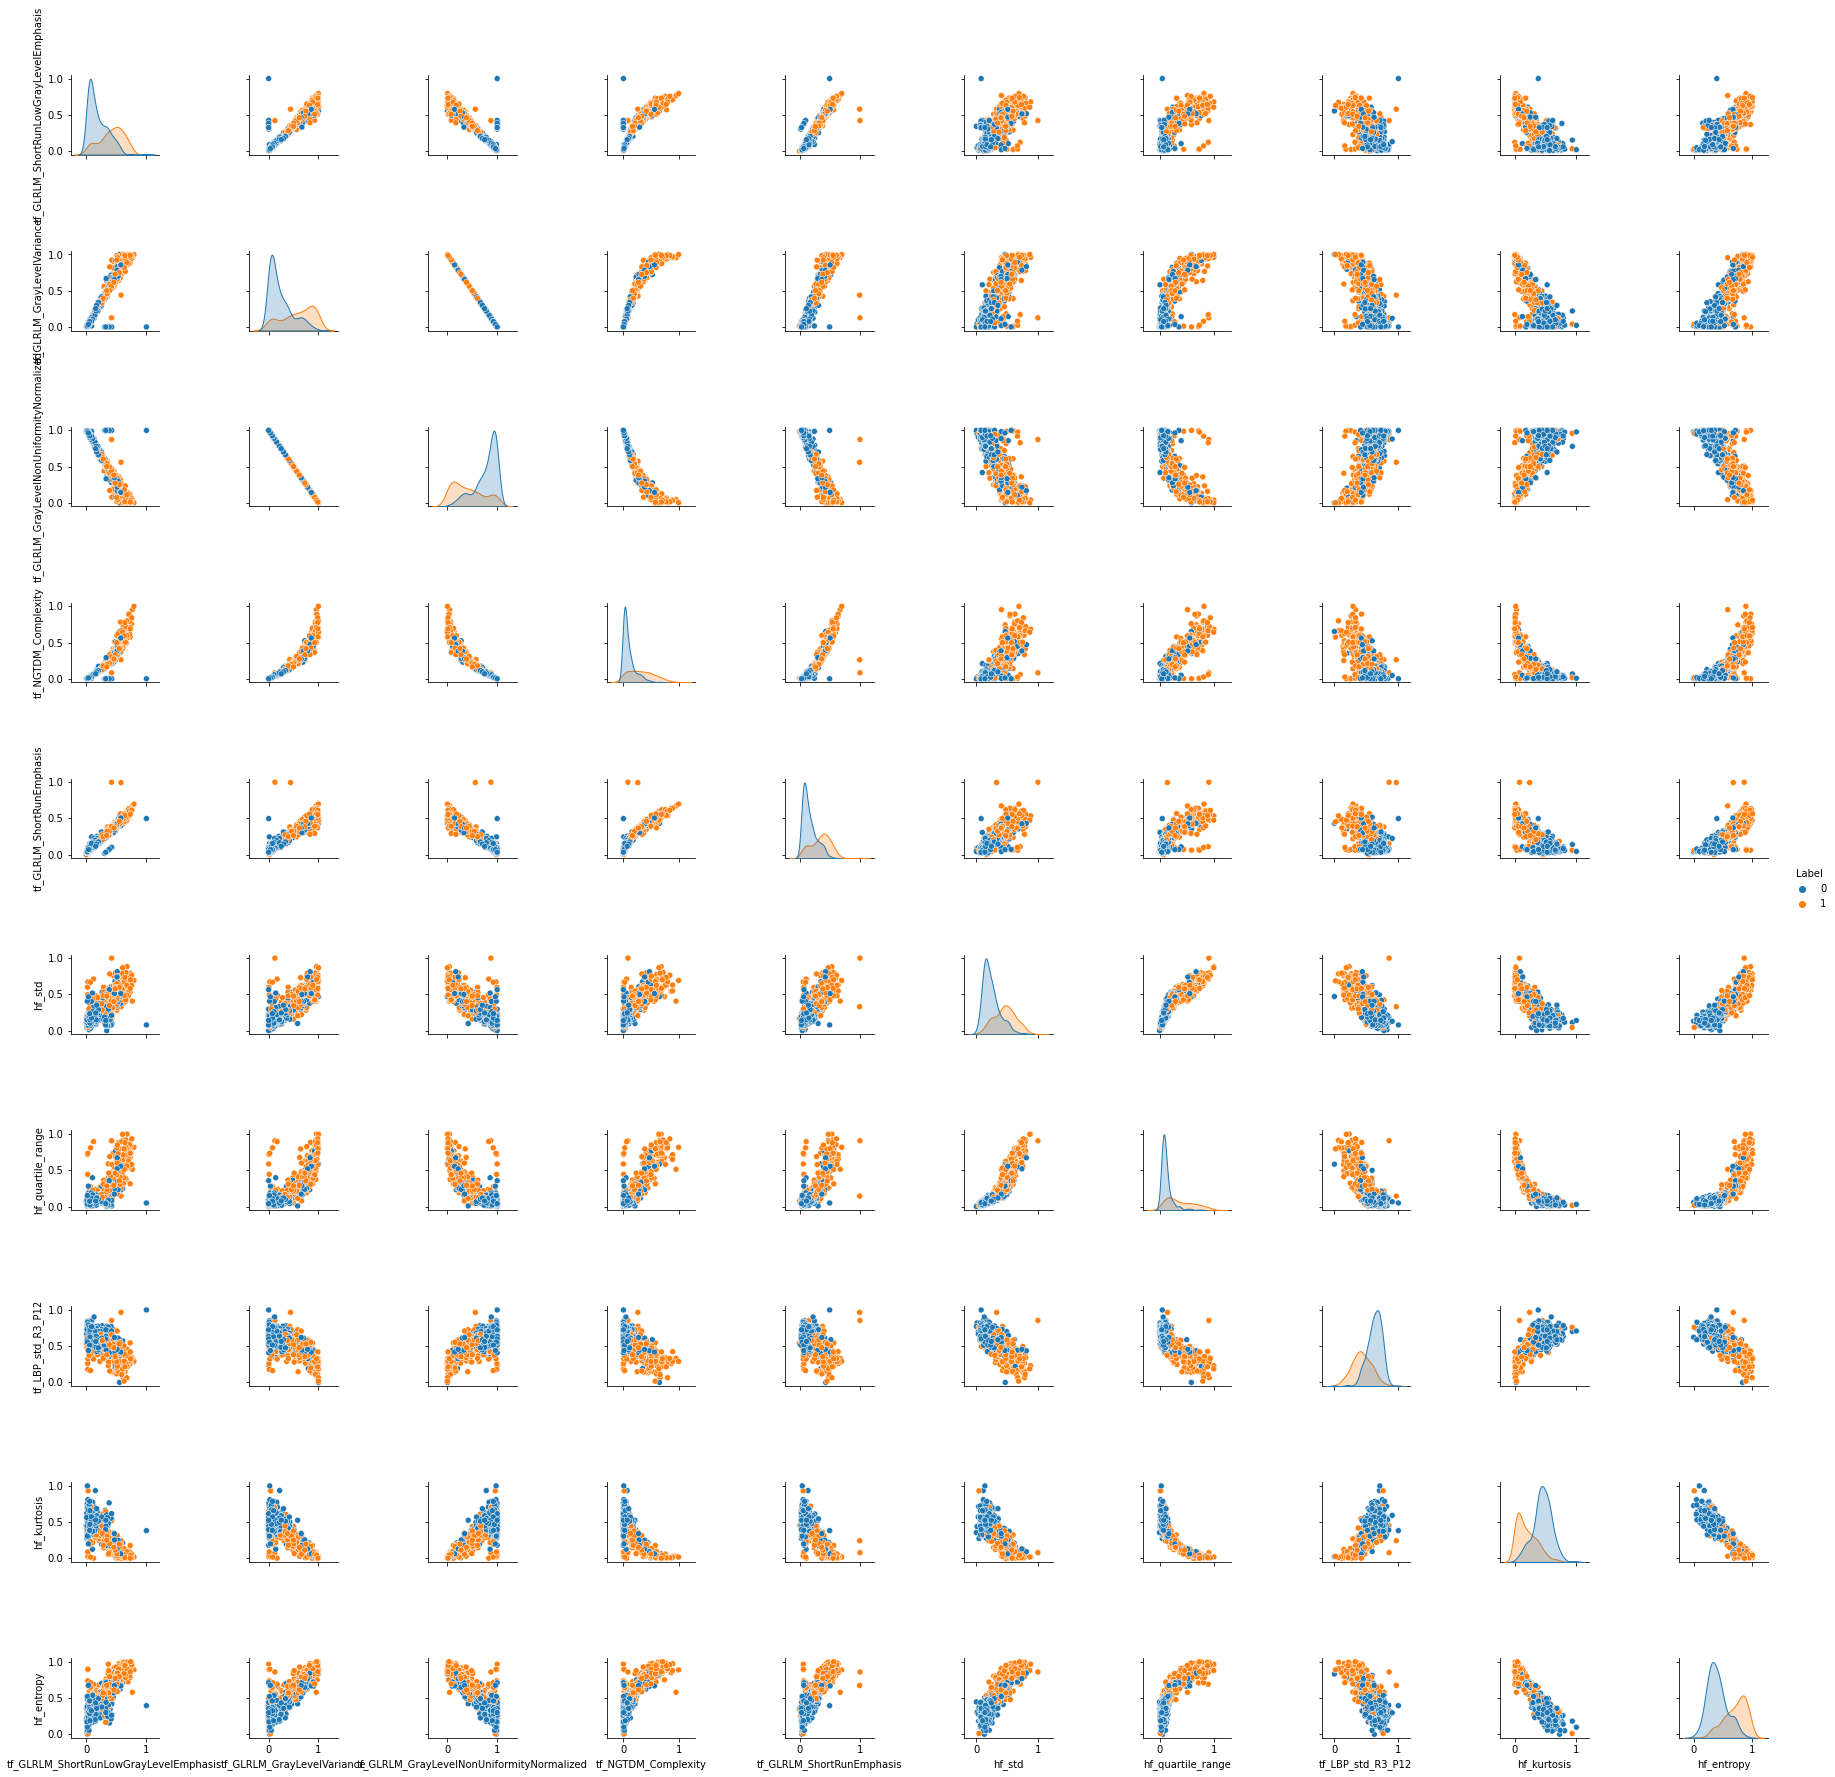

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import math 

bestfeatures = SelectKBest(score_func=f_classif, k=len(data_designset_norm.columns))
fit = bestfeatures.fit(data_designset_norm, label_designset)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data_designset_norm.columns)

feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_scores.columns = ['Specs','Score']  
feature_scores = feature_scores.sort_values('Score')
highest_feature_score = feature_scores['Score'].iloc[-1]
threshold_feature_relative = 0.5                                                # Optimization of parameter is needed
threshold_feature_score = threshold_feature_relative*highest_feature_score
criteria = feature_scores['Score']>=threshold_feature_score

feature_selection_names = []
for i in range(0,len(feature_scores['Score'])):
  if feature_scores['Score'].iloc[i]>=threshold_feature_score:
    feature_selection_names.append(feature_scores['Specs'].iloc[i])

# print(feature_selection_names)
# print(len(feature_selection_names))
selected_data_designset_norm = data_designset_norm[feature_selection_names]

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(label_designset)
# print(selected_data_designset_norm)
import seaborn as sns
selected_data_designset_norm['Label'] = labels
sns.pairplot(selected_data_designset_norm, hue='Label')

# print(feature_scores.nlargest(10,'Score'))


# PCA - BASIS

In [ ]:
# General Import
from sklearn.decomposition import PCA

# Create a PCA which retains n principle components
n_pca = 5
pca = PCA(n_components=n_pca)

# Fit the PCA model, point_data_train should be a 2D numpy array
# which has one row per subject and the pointdata as columns where
# the columns are x1, y1, z1, x2, y2, z2, ..., xn, yn, zn
pca.fit(x_train)

# Transform data
selected_data_trainset_trans = pca.transform(x_train)
print(data_trainset_trans)

[[-0.4240283   0.69619987  0.75375089 -0.13412269 -0.88390469]
 [-0.88516757 -0.6048795  -0.43968825  0.23650873 -0.13161926]
 [-1.32839282 -1.18676818 -0.71593989  0.37403718 -0.19717475]
 ...
 [-0.87393793  2.06784419  0.20802999  1.72922291  0.23744782]
 [-0.70226101  1.11946552  1.42546138 -0.81896458 -0.35024505]
 [-0.54073193 -0.02707676  0.06449632 -0.34814736  0.22938564]]


## PCA with KNN

Best classifier: k=23
Best classifier: k=25
Best classifier: k=23
Best classifier: k=23
Best classifier: k=21
Best classifier: k=25
Best classifier: k=21
Best classifier: k=25
Best classifier: k=25
Best classifier: k=23
The optimal N=23
Best classifier: k=25
Best classifier: k=21
Best classifier: k=25
Best classifier: k=23
Best classifier: k=21
Best classifier: k=23
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=23
The optimal N=24
Best classifier: k=23
Best classifier: k=25
Best classifier: k=25
Best classifier: k=23
Best classifier: k=25
Best classifier: k=19
Best classifier: k=23
Best classifier: k=23
Best classifier: k=25
Best classifier: k=25
The optimal N=24
Best classifier: k=23
Best classifier: k=21
Best classifier: k=23
Best classifier: k=23
Best classifier: k=23
Best classifier: k=19
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
The optimal N=23
Best classifier: k=25
Best classifier: k=21
Best cla

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Best classifier: k=25
Best classifier: k=23
Best classifier: k=23
Best classifier: k=23
Best classifier: k=23
Best classifier: k=23
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
The optimal N=24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Best classifier: k=25
Best classifier: k=25
Best classifier: k=23
Best classifier: k=23
Best classifier: k=23
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=23
Best classifier: k=23
The optimal N=24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=23
Best classifier: k=25
Best classifier: k=23
Best classifier: k=25
Best classifier: k=25
Best classifier: k=23
Best classifier: k=25
The optimal N=25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Best classifier: k=23
Best classifier: k=25
Best classifier: k=25
Best classifier: k=23
Best classifier: k=25
Best classifier: k=23
Best classifier: k=25
Best classifier: k=21
Best classifier: k=25
Best classifier: k=25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


The optimal N=25
Best classifier: k=23
Best classifier: k=23
Best classifier: k=25
Best classifier: k=21
Best classifier: k=23
Best classifier: k=23
Best classifier: k=23
Best classifier: k=19
Best classifier: k=25
Best classifier: k=25
The optimal N=23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Best classifier: k=25
Best classifier: k=25
Best classifier: k=19
Best classifier: k=23
Best classifier: k=21
Best classifier: k=23
Best classifier: k=23
Best classifier: k=25
Best classifier: k=23
Best classifier: k=25
The optimal N=23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Best classifier: k=23
Best classifier: k=21
Best classifier: k=25
Best classifier: k=23
Best classifier: k=19
Best classifier: k=25
Best classifier: k=23
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
The optimal N=24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Best classifier: k=25
Best classifier: k=23
Best classifier: k=23
Best classifier: k=23
Best classifier: k=21
Best classifier: k=23
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
The optimal N=24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Best classifier: k=25
Best classifier: k=23
Best classifier: k=23
Best classifier: k=21
Best classifier: k=25
Best classifier: k=21
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
The optimal N=25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Best classifier: k=25
Best classifier: k=23
Best classifier: k=25
Best classifier: k=23
Best classifier: k=25
Best classifier: k=21
Best classifier: k=25
Best classifier: k=23
Best classifier: k=23
Best classifier: k=17
The optimal N=23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Best classifier: k=25
Best classifier: k=23
Best classifier: k=23
Best classifier: k=21
Best classifier: k=21
Best classifier: k=21
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=17
The optimal N=23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Best classifier: k=25
Best classifier: k=25
Best classifier: k=23
Best classifier: k=25
Best classifier: k=25
Best classifier: k=21
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=17
The optimal N=25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Best classifier: k=25
Best classifier: k=23
Best classifier: k=19
Best classifier: k=25
Best classifier: k=21
Best classifier: k=19
Best classifier: k=23
Best classifier: k=19
Best classifier: k=23
Best classifier: k=19
The optimal N=22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Best classifier: k=25
Best classifier: k=23
Best classifier: k=23
Best classifier: k=25
Best classifier: k=21
Best classifier: k=19
Best classifier: k=25
Best classifier: k=19
Best classifier: k=25
Best classifier: k=19
The optimal N=23
╒════════════════════════╤════════════╤══════════════════════════╤═════════════╕
│   Number of Components │   Mean AUC │   Standard deviation AUC │   Optimal k │
╞════════════════════════╪════════════╪══════════════════════════╪═════════════╡
│                      1 │   0.832275 │                0.0540723 │          23 │
├────────────────────────┼────────────┼──────────────────────────┼─────────────┤
│                      5 │   0.853307 │                0.0456472 │          24 │
├────────────────────────┼────────────┼──────────────────────────┼─────────────┤
│                      9 │   0.854938 │                0.0406261 │          24 │
├────────────────────────┼────────────┼──────────────────────────┼─────────────┤
│                     13 │   0.859

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


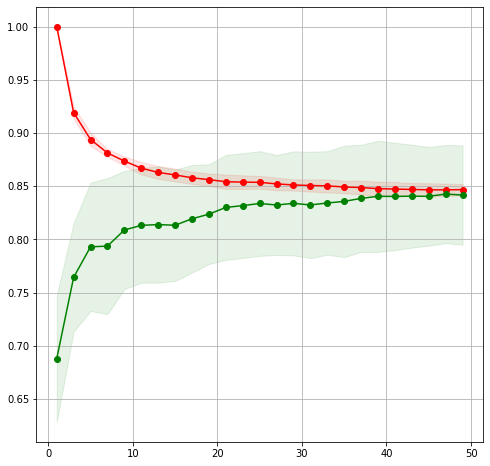

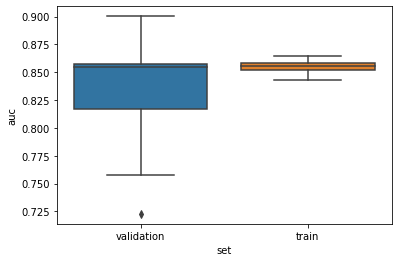

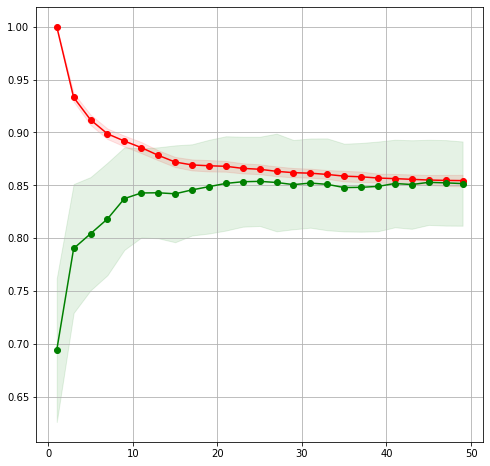

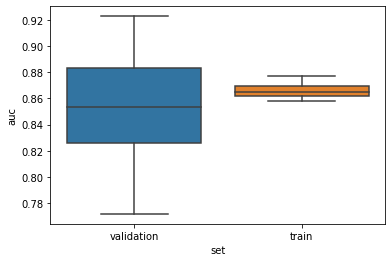

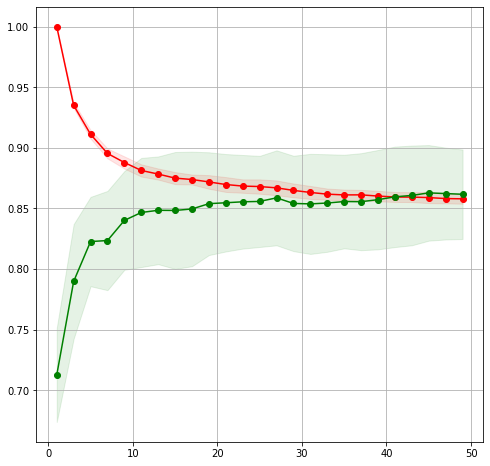

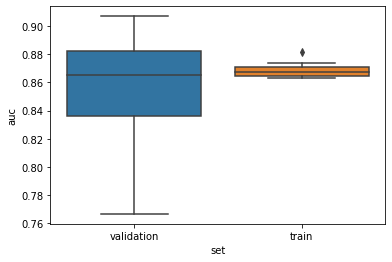

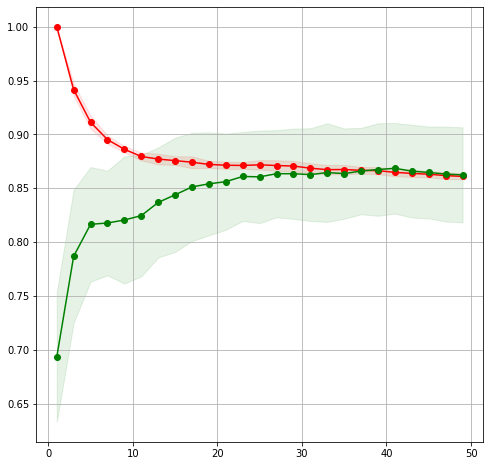

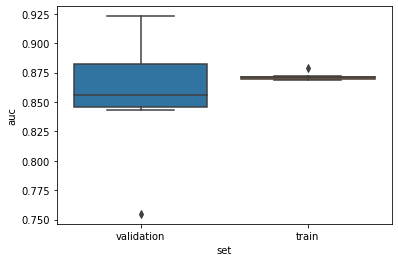

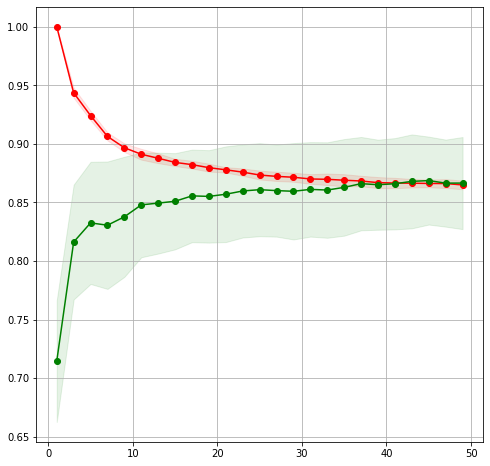

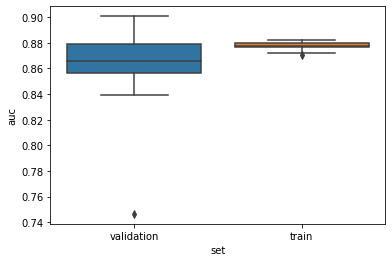

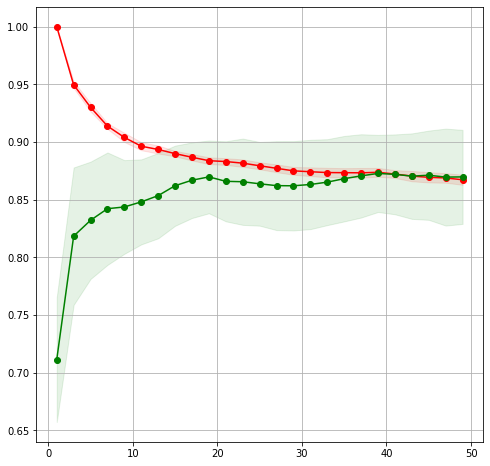

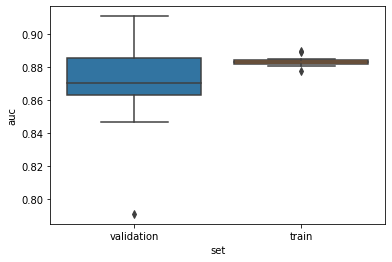

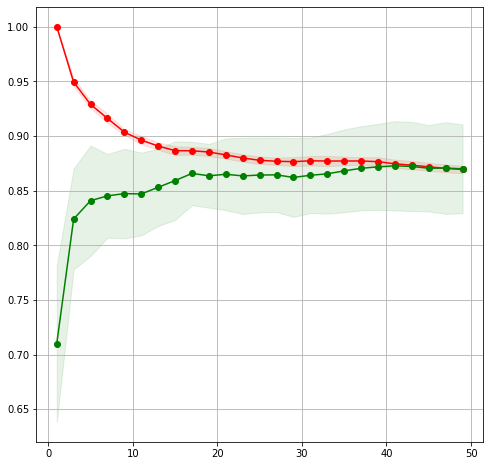

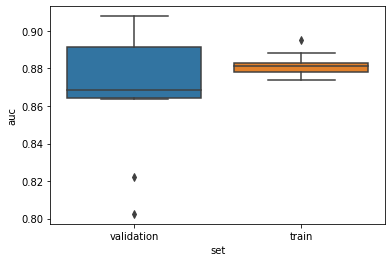

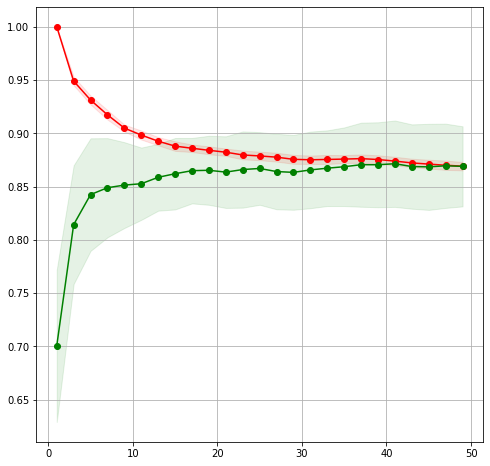

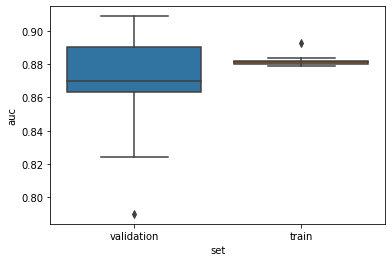

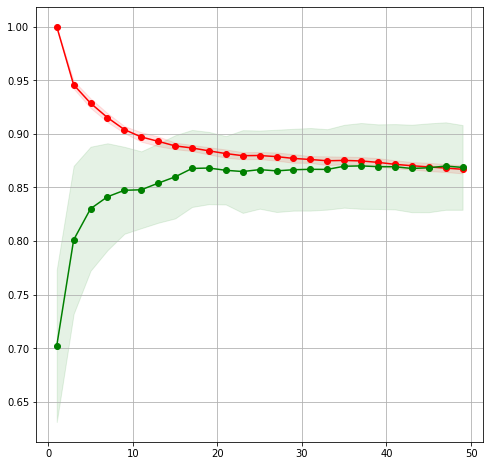

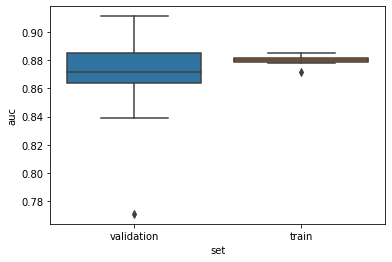

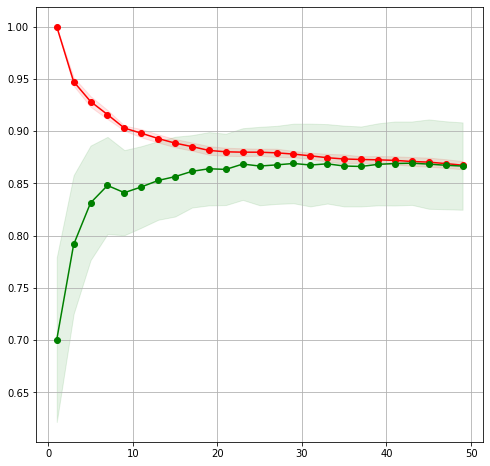

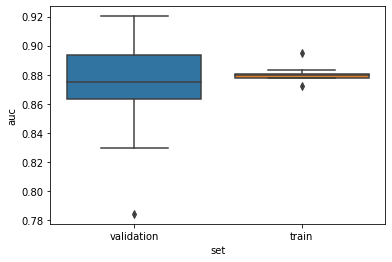

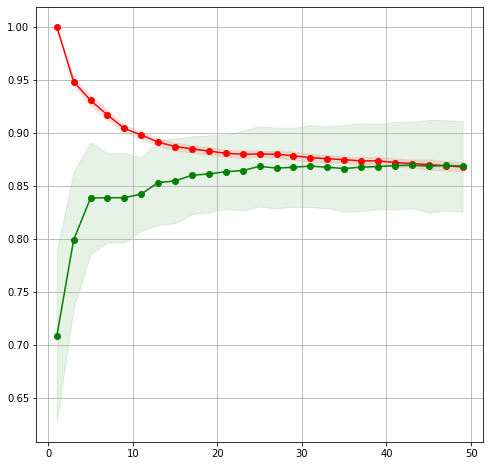

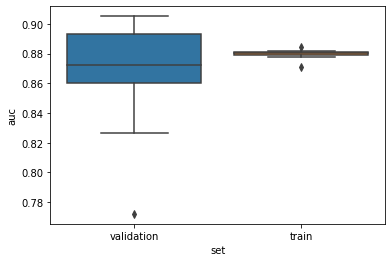

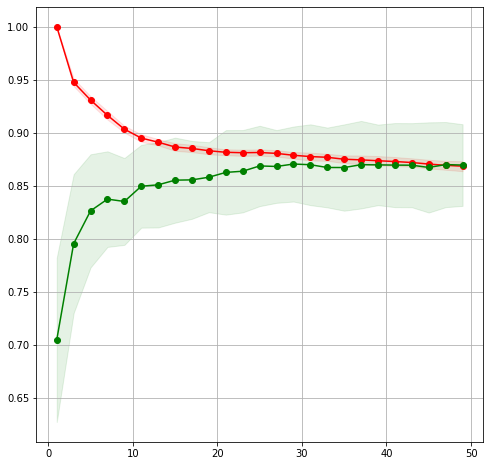

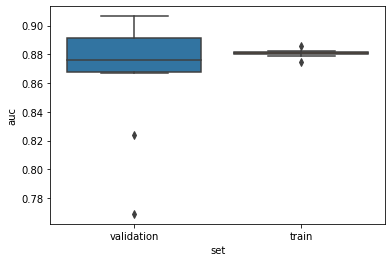

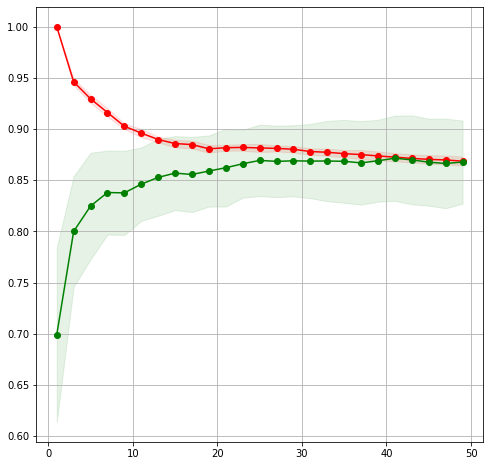

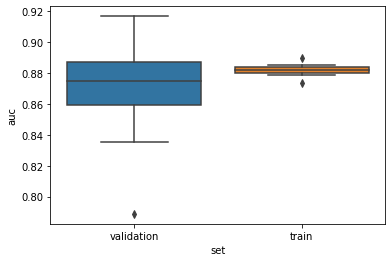

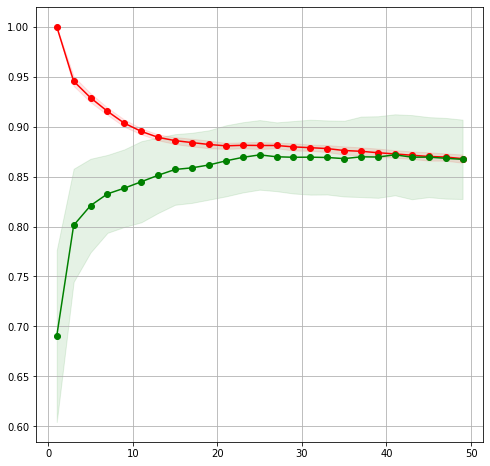

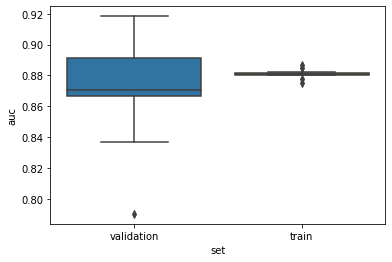

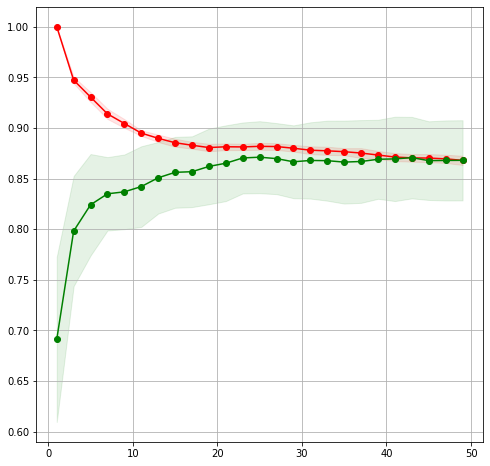

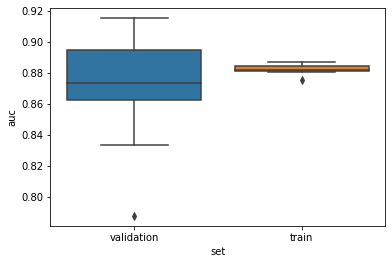

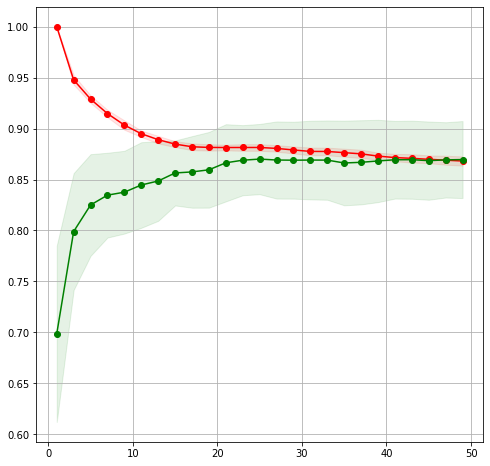

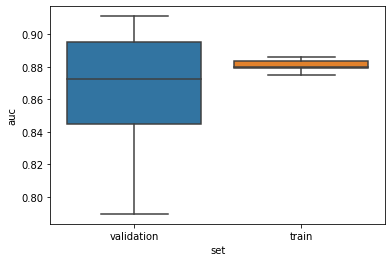

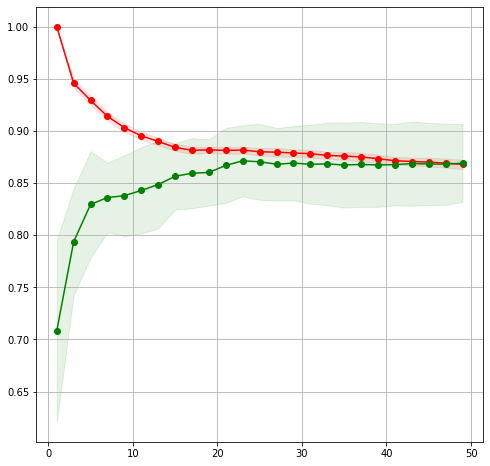

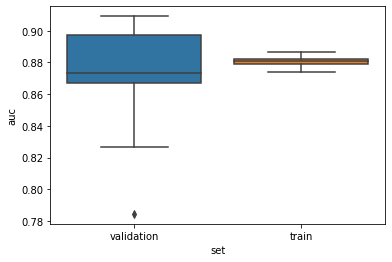

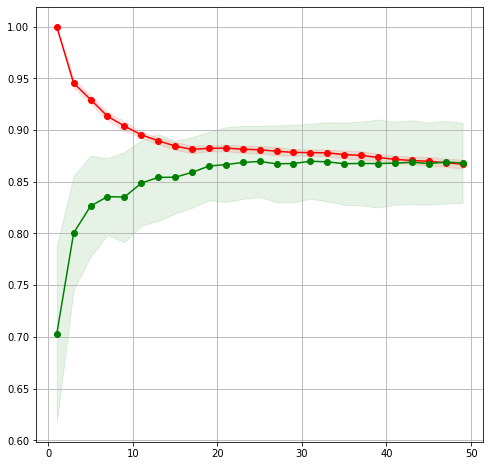

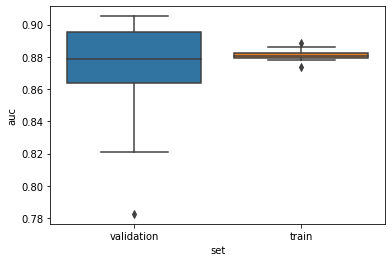

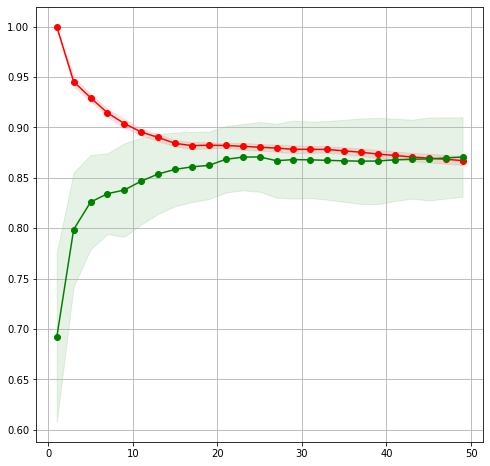

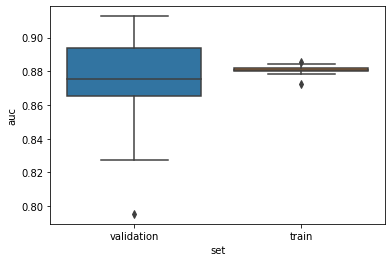

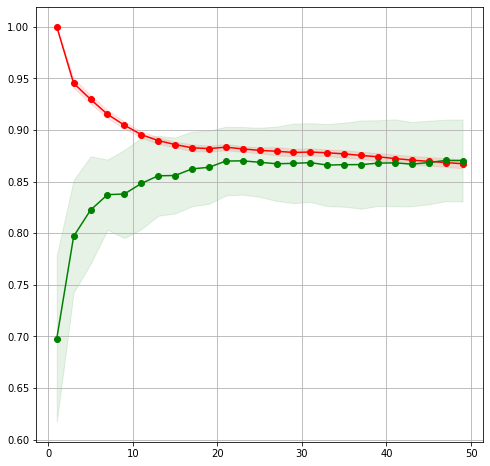

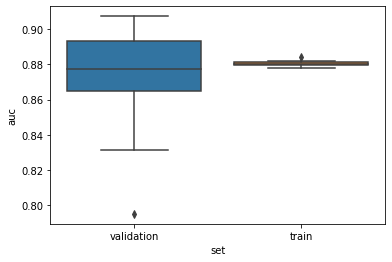

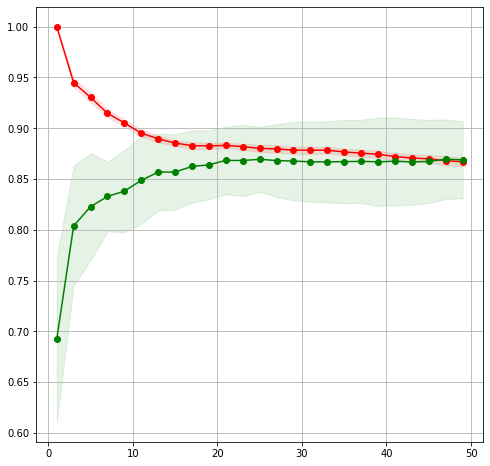

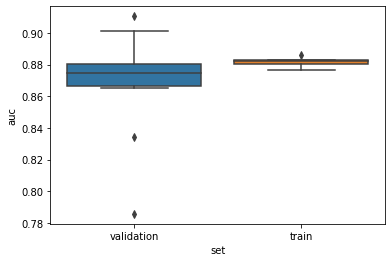

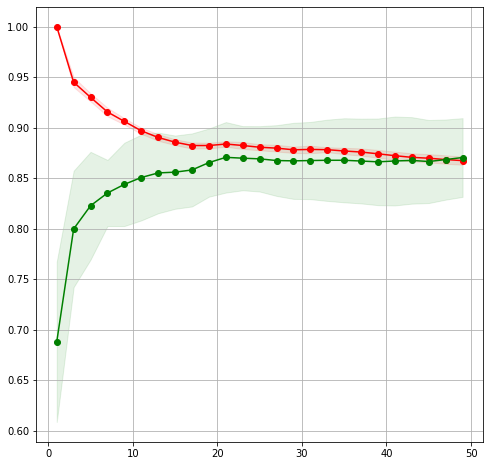

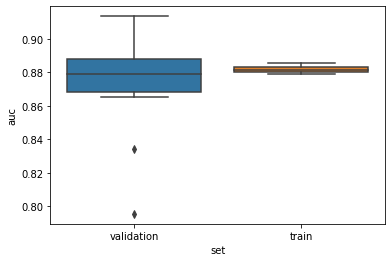

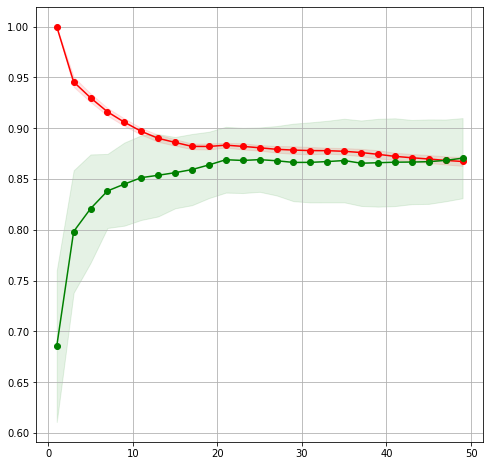

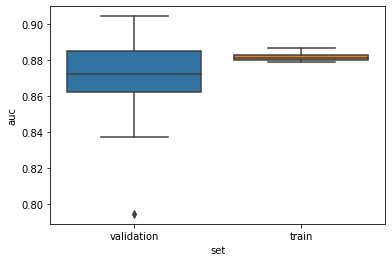

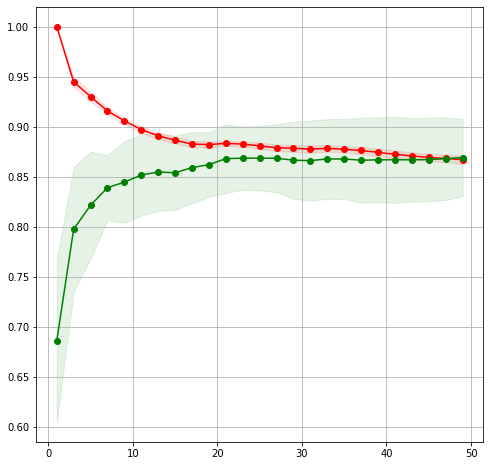

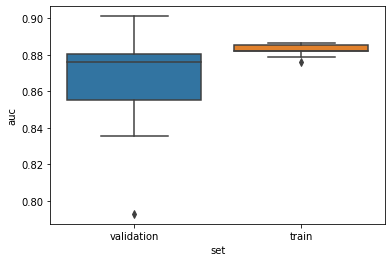

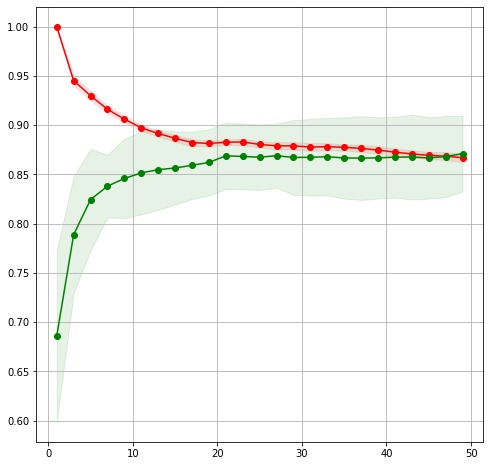

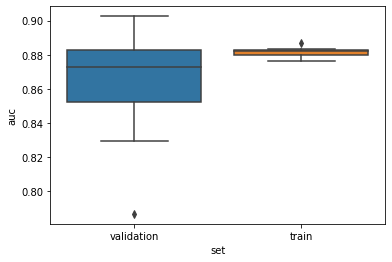

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import neighbors, metrics
import seaborn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import math
from sklearn.decomposition import PCA
!pip install tabulate
from tabulate import tabulate

# configure the cross-validation procedure. A 10 fold split is used stratified for the label. 
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.1, random_state=1)
k_list = list(range(1, 50, 2))
threshold = []
mean_auc_val = []
std_auc_val = []
optimal_k = []
n_pca = list(range(1,100,4))

for n_component in n_pca:
  
  all_train = []
  all_val = []
  results = []
  best_n_neighbors = []

  for train_idx, val_idx in sss.split(data_designset_norm,label_designset): # split data
    x_train, x_val = data_designset_norm.to_numpy()[train_idx], data_designset_norm.to_numpy()[val_idx]
    y_train, y_val = label_designset.to_numpy()[train_idx], label_designset.to_numpy()[val_idx]

    train_scores = []
    val_scores = []

    # Create a PCA which retains n principle components
    pca = PCA(n_components=n_component)

    # Fit the PCA model, point_data_train should be a 2D numpy array
    # which has one row per subject and the pointdata as columns where
    # the columns are x1, y1, z1, x2, y2, z2, ..., xn, yn, zn
    pca.fit(x_train)

    # Transform data and create the components of the data 
    selected_data_pca_trainset = pca.transform(x_train)
    selected_data_pca_valset = pca.transform(x_val)

    # Aplly K-Nearest Neighbor classifier to components generated with PCA 
    for k in k_list: 
      clf_knn = neighbors.KNeighborsClassifier(n_neighbors=k)
      clf_knn.fit(selected_data_pca_trainset, y_train)

      # Test the classifier on the selected features from the training data and plot 
      train_proba = clf_knn.predict_proba(selected_data_pca_trainset)[:,1]
      val_proba = clf_knn.predict_proba(selected_data_pca_valset)[:,1]

      score_train = metrics.roc_auc_score(y_train, train_proba)
      score_val = metrics.roc_auc_score(y_val, val_proba)

      train_scores.append(score_train)
      val_scores.append(score_val)

    all_train.append(train_scores)
    all_val.append(val_scores)

    # Create a grid search to find the optimal k using a gridsearch and 10-fold cross validation
    # Same as above
    parameters = {"n_neighbors": list(range(1, 26, 2))}
    knn = neighbors.KNeighborsClassifier()
    cv_10fold = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(knn, parameters, cv=cv_10fold, scoring='roc_auc')
    grid_search.fit(selected_data_pca_trainset, y_train)
    
    # Get resulting classifier
    clf = grid_search.best_estimator_
    print(f'Best classifier: k={clf.n_neighbors}')
    best_n_neighbors.append(clf.n_neighbors)
    
    # Test the classifier on the test data
    probabilities = clf.predict_proba(selected_data_pca_valset)
    scores = probabilities[:, 1]
    
    # Get the auc
    auc = metrics.roc_auc_score(y_val, scores)
    results.append({
        'auc': auc,
        'k': clf.n_neighbors,
        'set': 'validation'
    })
     
    # Test the classifier on the validation data
    probabilities_train = clf.predict_proba(selected_data_pca_trainset)
    scores_train = probabilities_train[:, 1]
    
    # Get the auc
    auc_train = metrics.roc_auc_score(y_train, scores_train)
    results.append({
        'auc': auc_train,
        'k': clf.n_neighbors,
        'set': 'train'
    })
    
  # Calculate the mean and std
  all_train = np.array(all_train)
  all_val = np.array(all_val)

  train_scores_mean = all_train.mean(axis=0)
  val_scores_mean = all_val.mean(axis=0)

  train_scores_std = all_train.std(axis=0)
  val_scores_std = all_val.std(axis=0)

  # Plot the mean scores and the std as shading
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)
  ax.grid()
  ax.fill_between(k_list, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
  ax.fill_between(k_list, val_scores_mean - val_scores_std,
                      val_scores_mean + val_scores_std, alpha=0.1,
                      color="g")
  ax.plot(k_list, train_scores_mean, 'o-', color="r",
          label="Training score")
  ax.plot(k_list, val_scores_mean, 'o-', color="g",
          label="Validation score")
  
  # Create results dataframe and plot it
  plt.figure()
  results = pd.DataFrame(results)
  seaborn.boxplot(y='auc', x='set', data=results)

  optimal_n = int(np.median(best_n_neighbors))
  print(f"The optimal N={optimal_n}")

  auc_val = results[results['set'].str.contains('validation')]
  
  threshold.append(n_component)
  mean_auc_val.append(auc_val['auc'].mean())
  std_auc_val.append(auc_val['auc'].std())
  optimal_k.append(int(np.median(best_n_neighbors)))
    
auc_table = {'Number of Components': threshold, 'Mean AUC': mean_auc_val, 'Standard deviation AUC': std_auc_val, 'Optimal k': optimal_k}
print(tabulate(auc_table, headers='keys', tablefmt='fancy_grid'))

# Best values are n_components 21 and 20 k-NN

# SVM Linear + univariate

In [29]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
from sklearn import neighbors, metrics
from sklearn.svm import SVC
import seaborn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import math
import seaborn as sns
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

# Which kernels do we use:
kernels = ('Polynomial 2', 'Polynomial 3', 'Polynomial 4', 'Polynomial 5', 'Polynomial 6', 'Polynomial 7', 'Polynomial 8', 'Polynomial 9', 'Polynomial 10', 'RBF', 'Sigmoid','Linear')#A function which returns the corresponding SVC model
def getClassifier(ktype): 
  if ktype == 0:
      # Polynomial kernal
      return SVC(kernel='poly', degree=2, gamma="auto", probability=True, random_state=0)
  elif ktype == 1:
      # Polynomial kernal
      return SVC(kernel='poly', degree=3, gamma="auto", probability=True, random_state=0)
  elif ktype == 2:
      # Polynomial kernal
      return SVC(kernel='poly', degree=4, gamma="auto", probability=True, random_state=0)
  elif ktype == 3:
      # Polynomial kernal
      return SVC(kernel='poly', degree=5, gamma="auto", probability=True, random_state=0)
  elif ktype == 4:
      # Polynomial kernal
      return SVC(kernel='poly', degree=6, gamma="auto", probability=True, random_state=0)
  elif ktype == 5:
      # Polynomial kernal
      return SVC(kernel='poly', degree=7, gamma="auto", probability=True, random_state=0)
  elif ktype == 6:
      # Polynomial kernal
      return SVC(kernel='poly', degree=8, gamma="auto", probability=True, random_state=0)
  elif ktype == 7:
      # Polynomial kernal
      return SVC(kernel='poly', degree=9, gamma="auto", probability=True, random_state=0)
  elif ktype == 8:
      # Polynomial kernal
      return SVC(kernel='poly', degree=10, gamma="auto", probability=True, random_state=0)
  elif ktype == 9:
      # Radial Basis Function kernal
      return SVC(kernel='rbf', gamma="auto", probability=True, random_state=0)
  elif ktype == 10:
      # Sigmoid kernal
      return SVC(kernel='sigmoid', gamma="auto", probability=True, random_state=0)
  elif ktype == 11:
      # Linear kernal
      return SVC(kernel='linear', gamma="auto", probability=True, random_state=0)

# Apply SVC and calculate the accuracy and AUC
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.1, random_state=1)
all_train_mean = []
all_val_mean = []
all_train_std = []
all_val_std = []
all_mean_accuracies = []
all_mean_sensitivities = []
all_mean_specificities = []

for ker in range(12):
  train_scores = []
  val_scores = []
  ACCURACIES = []
  SPECIFICITIES = []
  SENSITIVITIES = []

  for train_idx, val_idx in sss.split(data_designset_norm,label_designset): # split data
    
    x_train, x_val = data_designset_norm.to_numpy()[train_idx], data_designset_norm.to_numpy()[val_idx]
    y_train, y_val = label_designset.to_numpy()[train_idx], label_designset.to_numpy()[val_idx]

    # Feature selection using univariate statistical testing. An one-way ANOVA is used and the features are scored. 
    bestfeatures = SelectKBest(score_func=f_classif, k=len(data_designset_norm.columns))
    fit = bestfeatures.fit(x_train, y_train)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(data_designset_norm.columns)

    feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
    feature_scores.columns = ['Specs','Score']  
    feature_scores = feature_scores.sort_values('Score')
    highest_feature_score = feature_scores['Score'].iloc[-1]
    threshold_feature_relative = 0.7
    threshold_feature_score = threshold_feature_relative*highest_feature_score

    # Every feature scoring above the threshold will be selected. 
    feature_selection_names = []
    for i in range(0,len(feature_scores['Score'])):
      if feature_scores['Score'].iloc[i]>=threshold_feature_score:
        feature_selection_names.append(feature_scores['Specs'].iloc[i])
    
    selected_data_univ_designset_norm = data_designset_norm[feature_selection_names]
    selected_data_univ_trainset_norm = selected_data_univ_designset_norm.to_numpy()[train_idx]
    selected_data_univ_valset_norm = selected_data_univ_designset_norm.to_numpy()[val_idx]

    svclassifier = getClassifier(ker) 
    svclassifier.fit(selected_data_univ_trainset_norm, y_train)   # Train classifier 

    y_pred_train = svclassifier.predict(selected_data_univ_trainset_norm) # Apply classifier on trainset (Make prediction, label with class)
    y_pred_val = svclassifier.predict(selected_data_univ_valset_norm) # Apply classifier on validationset (Make prediction, label with class)
    y_pred_train_score = svclassifier.predict_proba(selected_data_univ_trainset_norm)[:,1] # Apply classifier on trainset (Make prediction, prediction for CN)
    y_pred_train_score = np.round(y_pred_train_score)
    y_pred_val_score = svclassifier.predict_proba(selected_data_univ_valset_norm)[:,1] # Apply classifier on trainset (Make prediction, prediction for CN)
    y_pred_val_score = np.round(y_pred_val_score)
    # print(y_pred_val)         Kunnen verschillen door zie https://scikit-learn.org/stable/modules/svm.html#scores-probabilities 1.4.1.2
    # print(y_pred_val_score)
    score_train = metrics.roc_auc_score(y_train, y_pred_train_score)
    score_val = metrics.roc_auc_score(y_val, y_pred_val_score)
    train_scores.append(score_train)
    val_scores.append(score_val)

    classification_report_val = classification_report(y_val,y_pred_val, output_dict=True)
    accuracy = classification_report_val['accuracy']
    sensitivity = classification_report_val['AD']['recall'] # In binary classification, recall of the positive class is also known as 'sensitivity'
    specificity = classification_report_val['CN']['recall'] # In binary classification, recall of the negative class is also known as 'specificity'

    ACCURACIES.append(accuracy)
    SENSITIVITIES.append(sensitivity)
    SPECIFICITIES.append(specificity)

    # true_positive, false_negative, false_positive, true_negative = metrics.confusion_matrix(y_val,y_pred_val,labels=['AD', 'CN']).ravel()
    # accuracy = metrics.accuracy_score(y_val, y_pred_val)
    # print('Accuracy', accuracy)
    # sensitivity = true_positive / (true_positive+false_negative)
    # specificity = true_negative / (true_negative+false_positive)
    # print('Sensitivity', sensitivity)
    # print('Specificity', specificity)
    # classification_report_test = classification_report(y_val,y_pred_val)
    # print(classification_report_test)
    # print(classification_report_test)
    # print('Accuracy:', )
    # print('Sensitivity:', )
    # print('Specificity:', classification_report_test['CN']['recall'])
    
  mean_accuracies = np.array(ACCURACIES).mean()
  all_mean_accuracies.append(mean_accuracies)
  mean_sensitivities = np.array(SENSITIVITIES).mean()
  all_mean_sensitivities.append(mean_sensitivities)
  mean_specificities = np.array(SPECIFICITIES).mean()
  all_mean_specificities.append(mean_specificities)

  train_scores_std = np.array(train_scores).std()
  val_scores_std = np.array(val_scores).std()

  train_scores_mean = np.array(train_scores).mean()
  val_scores_mean = np.array(val_scores).mean()

  all_train_mean.append(train_scores_mean)
  all_train_std.append(train_scores_std)
  all_val_mean.append(val_scores_mean)
  all_val_std.append(val_scores_std)
 
auc_table = {'Kernel': kernels, 'Mean AUC': all_val_mean, 'Standard deviation AUC': all_val_std, 'Mean Accuracy': all_mean_accuracies, 'Mean Sensitivity': all_mean_sensitivities, 'Mean Specificity': all_mean_specificities}
print(tabulate(auc_table, headers='keys', tablefmt='fancy_grid')) 

# Be aware, class AD corresponds to 0 and class CN to 1, which is in the medical world often the other way around.
# So the sensitivity refers to the probability of being tested CN conditioned truly being CN?
# And the specificity refers to the probability of being tested AD conditioned truly being AD?

╒═══════════════╤════════════╤══════════════════════════╤═════════════════╤════════════════════╤════════════════════╕
│ Kernel        │   Mean AUC │   Standard deviation AUC │   Mean Accuracy │   Mean Sensitivity │   Mean Specificity │
╞═══════════════╪════════════╪══════════════════════════╪═════════════════╪════════════════════╪════════════════════╡
│ Polynomial 2  │   0.789286 │                0.0387819 │        0.794203 │           0.914286 │          0.607407  │
├───────────────┼────────────┼──────────────────────────┼─────────────────┼────────────────────┼────────────────────┤
│ Polynomial 3  │   0.775926 │                0.0447989 │        0.791304 │           0.969048 │          0.514815  │
├───────────────┼────────────┼──────────────────────────┼─────────────────┼────────────────────┼────────────────────┤
│ Polynomial 4  │   0.760317 │                0.0610498 │        0.718841 │           0.990476 │          0.296296  │
├───────────────┼────────────┼──────────────────────────

# SVM + univariate 
First step: Beeld krijgen van de data. Hoe scoren de kernels zonder hyper parameter tuning. 

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
from sklearn import neighbors, metrics
from sklearn.svm import SVC
import seaborn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import math
import seaborn as sns

kernels = ['Polynomial 2', 'Polynomial 3', 'Polynomial 4', 'Polynomial 5', 'Polynomial 6' 'Polynomial 7', 'Polynomial 8', 'Polynomial 9', 'Polynomial 10', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
  if ktype == 0:
      # Polynomial kernal
      return SVC(kernel='poly', degree=2, gamma="auto")
  elif ktype == 1:
      # Polynomial kernal
      return SVC(kernel='poly', degree=3, gamma="auto")
  elif ktype == 2:
      # Polynomial kernal
      return SVC(kernel='poly', degree=4, gamma="auto")
  elif ktype == 3:
      # Polynomial kernal
      return SVC(kernel='poly', degree=5, gamma="auto")
  elif ktype == 4:
      # Polynomial kernal
      return SVC(kernel='poly', degree=6, gamma="auto")
  elif ktype == 5:
      # Polynomial kernal
      return SVC(kernel='poly', degree=7, gamma="auto")
  elif ktype == 6:
      # Polynomial kernal
      return SVC(kernel='poly', degree=8, gamma="auto")
  elif ktype == 7:
      # Polynomial kernal
      return SVC(kernel='poly', degree=9, gamma="auto")
  elif ktype == 8:
      # Polynomial kernal
      return SVC(kernel='poly', degree=10, gamma="auto")
  elif ktype == 9:
      # Radial Basis Function kernal
      return SVC(kernel='rbf', gamma="auto")
  elif ktype == 10:
      # Sigmoid kernal
      return SVC(kernel='sigmoid', gamma="auto")
  elif ktype == 11:
      # Linear kernal
      return SVC(kernel='linear', gamma="auto")

# configure the cross-validation procedure. A 10 fold split is used stratified for the label. 
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.1, random_state=1)
for ker in range(11):
  for train_idx, val_idx in sss.split(data_designset_norm,label_designset): # split data
    x_train, x_val = data_designset_norm.to_numpy()[train_idx], data_designset_norm.to_numpy()[val_idx]
    y_train, y_val = label_designset.to_numpy()[train_idx], label_designset.to_numpy()[val_idx]

    # Feature selection using univariate statistical testing. An one-way ANOVA is used and the features are scored. 
    bestfeatures = SelectKBest(score_func=f_classif, k=len(data_designset_norm.columns))
    fit = bestfeatures.fit(x_train, y_train)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(data_designset_norm.columns)

    feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
    feature_scores.columns = ['Specs','Score']  
    feature_scores = feature_scores.sort_values('Score')
    highest_feature_score = feature_scores['Score'].iloc[-1]
    threshold_feature_relative = 0.7
    threshold_feature_score = threshold_feature_relative*highest_feature_score

    # Every feature scoring above the threshold will be selected. 
    feature_selection_names = []
    for i in range(0,len(feature_scores['Score'])):
      if feature_scores['Score'].iloc[i]>=threshold_feature_score:
        feature_selection_names.append(feature_scores['Specs'].iloc[i])

    selected_data_univ_designset_norm = data_designset_norm[feature_selection_names]
    selected_data_univ_trainset_norm = selected_data_univ_designset_norm.to_numpy()[train_idx]
    selected_data_univ_valset_norm = selected_data_univ_designset_norm.to_numpy()[val_idx]

  svclassifier = getClassifier(ker) 
  svclassifier.fit(selected_data_univ_trainset_norm, y_train)# Make prediction
  y_pred = svclassifier.predict(selected_data_univ_valset_norm)# Evaluate our model
  print("Evaluation:", kernels[ker], "kernel")
  print(classification_report(y_val,y_pred))

# We hebben eerst hebben we features op 0.7 vastgezet bij univariate. Omdat er niet teveel features kunnen zijn bij SVM. Dit ga je hierna niet meer tunen.
# Vervolgens hebben we en functie gemaakt waarmee we voor alle kernels kunnen kijken hoe dit model het doet zonder hyperparametertuning
# Hier kwam als enige duidelijk uit dat polynomial kernel het minst presteerde. Hierna zijn we doorgegaan met de andere drie om een keuze te maken welke 2 het beste zijn. 



Evaluation: Polynomial 2 kernel
              precision    recall  f1-score   support

          AD       0.80      0.93      0.86        42
          CN       0.85      0.63      0.72        27

    accuracy                           0.81        69
   macro avg       0.82      0.78      0.79        69
weighted avg       0.82      0.81      0.80        69

Evaluation: Polynomial 3 kernel
              precision    recall  f1-score   support

          AD       0.79      0.98      0.87        42
          CN       0.94      0.59      0.73        27

    accuracy                           0.83        69
   macro avg       0.86      0.78      0.80        69
weighted avg       0.85      0.83      0.82        69

Evaluation: Polynomial 4 kernel
              precision    recall  f1-score   support

          AD       0.71      1.00      0.83        42
          CN       1.00      0.37      0.54        27

    accuracy                           0.75        69
   macro avg       0.86      0.6

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: Polynomial 6Polynomial 7 kernel
              precision    recall  f1-score   support

          AD       0.61      1.00      0.76        42
          CN       0.00      0.00      0.00        27

    accuracy                           0.61        69
   macro avg       0.30      0.50      0.38        69
weighted avg       0.37      0.61      0.46        69



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: Polynomial 8 kernel
              precision    recall  f1-score   support

          AD       0.61      1.00      0.76        42
          CN       0.00      0.00      0.00        27

    accuracy                           0.61        69
   macro avg       0.30      0.50      0.38        69
weighted avg       0.37      0.61      0.46        69



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Evaluation: Polynomial 9 kernel
              precision    recall  f1-score   support

          AD       0.61      1.00      0.76        42
          CN       0.00      0.00      0.00        27

    accuracy                           0.61        69
   macro avg       0.30      0.50      0.38        69
weighted avg       0.37      0.61      0.46        69

Evaluation: Polynomial 10 kernel


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

          AD       0.61      1.00      0.76        42
          CN       0.00      0.00      0.00        27

    accuracy                           0.61        69
   macro avg       0.30      0.50      0.38        69
weighted avg       0.37      0.61      0.46        69

Evaluation: RBF kernel
              precision    recall  f1-score   support

          AD       0.61      1.00      0.76        42
          CN       0.00      0.00      0.00        27

    accuracy                           0.61        69
   macro avg       0.30      0.50      0.38        69
weighted avg       0.37      0.61      0.46        69



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

          AD       0.86      0.86      0.86        42
          CN       0.78      0.78      0.78        27

    accuracy                           0.83        69
   macro avg       0.82      0.82      0.82        69
weighted avg       0.83      0.83      0.83        69

Evaluation: Linear kernel
              precision    recall  f1-score   support

          AD       0.86      0.86      0.86        42
          CN       0.78      0.78      0.78        27

    accuracy                           0.83        69
   macro avg       0.82      0.82      0.82        69
weighted avg       0.83      0.83      0.83        69



# SVM + univariate
hyper parameter tuning met alle kernels behalve polynomial. 

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
from sklearn import neighbors, metrics
from sklearn.svm import SVC
import seaborn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import math

# configure the cross-validation procedure. A 10 fold split is used stratified for the label. 
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.1, random_state=1)

for train_idx, val_idx in sss.split(data_designset_norm,label_designset): # split data
  x_train, x_val = data_designset_norm.to_numpy()[train_idx], data_designset_norm.to_numpy()[val_idx]
  y_train, y_val = label_designset.to_numpy()[train_idx], label_designset.to_numpy()[val_idx]

  train_scores = []
  val_scores = []

  # Feature selection using univariate statistical testing. An one-way ANOVA is used and the features are scored. 
  bestfeatures = SelectKBest(score_func=f_classif, k=len(data_designset_norm.columns))
  fit = bestfeatures.fit(x_train, y_train)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(data_designset_norm.columns)

  feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
  feature_scores.columns = ['Specs','Score']  
  feature_scores = feature_scores.sort_values('Score')
  highest_feature_score = feature_scores['Score'].iloc[-1]
  threshold_feature_relative = 0.7
  threshold_feature_score = threshold_feature_relative*highest_feature_score

  # Every feature scoring above the threshold will be selected. 
  feature_selection_names = []
  for i in range(0,len(feature_scores['Score'])):
    if feature_scores['Score'].iloc[i]>=threshold_feature_score:
      feature_selection_names.append(feature_scores['Specs'].iloc[i])

  selected_data_univ_designset_norm = data_designset_norm[feature_selection_names]
  selected_data_univ_trainset_norm = selected_data_univ_designset_norm.to_numpy()[train_idx]
  selected_data_univ_valset_norm = selected_data_univ_designset_norm.to_numpy()[val_idx]
  
  # defining parameter range
  param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear', 'rbf', 'sigmoid']}
  grid_search_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)

  # fitting the model for grid search
  grid_search_svm.fit(selected_data_univ_trainset_norm, y_train)
  print(grid_search_svm.best_estimator_)

  grid_predictions = grid_search_svm.predict(selected_data_univ_valset_norm)
  print(classification_report(y_val,grid_predictions))

# Eerst hebben we een parameter range bepaald van verschillende hyperparameters. 
# Hieruit kregen we voor alle 10 de cross validaties middels grid search de beste estimator eruit
# Dit grid model (waaruit de beste estimator kwam) is gebruikt om predictions te krijgen door gebruik te maken van de validatie set.
# vervolgens konden we een classificatie rapport maken. 
# Twijfel: vanwege CV komen er 10 beste estimators uit, dus vervolgens krijgen we voor elke fold een nieuw classificatierapport dat we niet kunnen middelen
# IDEE: misschien eerst een kernel kiezen (de 1 of 2 best presterende) en vervolgens daarna op deze kernels hyperparameters tunen. 


Fitting 5 folds for each of 64 candidates, totalling 320 fits
SVC(C=1, gamma=1, kernel='sigmoid')
              precision    recall  f1-score   support

          AD       0.89      0.74      0.81        42
          CN       0.68      0.85      0.75        27

    accuracy                           0.78        69
   macro avg       0.78      0.79      0.78        69
weighted avg       0.80      0.78      0.79        69

Fitting 5 folds for each of 64 candidates, totalling 320 fits
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

          AD       0.76      0.83      0.80        42
          CN       0.70      0.59      0.64        27

    accuracy                           0.74        69
   macro avg       0.73      0.71      0.72        69
weighted avg       0.74      0.74      0.73        69

Fitting 5 folds for each of 64 candidates, totalling 320 fits
SVC(C=10, gamma=1, kernel='linear')
              precision    recall  f1-score   support

          AD   

# UNIVARIATE - SVM - SIGMOID KERNEL

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
from sklearn import neighbors, metrics
from sklearn.svm import SVC
import seaborn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import math

# configure the cross-validation procedure. A 10 fold split is used stratified for the label. 
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.1, random_state=1)

for train_idx, val_idx in sss.split(data_designset_norm,label_designset): # split data
  x_train, x_val = data_designset_norm.to_numpy()[train_idx], data_designset_norm.to_numpy()[val_idx]
  y_train, y_val = label_designset.to_numpy()[train_idx], label_designset.to_numpy()[val_idx]

  train_scores = []
  val_scores = []

  # Feature selection using univariate statistical testing. An one-way ANOVA is used and the features are scored. 
  bestfeatures = SelectKBest(score_func=f_classif, k=len(data_designset_norm.columns))
  fit = bestfeatures.fit(x_train, y_train)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(data_designset_norm.columns)

  feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
  feature_scores.columns = ['Specs','Score']  
  feature_scores = feature_scores.sort_values('Score')
  highest_feature_score = feature_scores['Score'].iloc[-1]
  threshold_feature_relative = 0.7
  threshold_feature_score = threshold_feature_relative*highest_feature_score

  # Every feature scoring above the threshold will be selected. 
  feature_selection_names = []
  for i in range(0,len(feature_scores['Score'])):
    if feature_scores['Score'].iloc[i]>=threshold_feature_score:
      feature_selection_names.append(feature_scores['Specs'].iloc[i])

  selected_data_univ_designset_norm = data_designset_norm[feature_selection_names]
  selected_data_univ_trainset_norm = selected_data_univ_designset_norm.to_numpy()[train_idx]
  selected_data_univ_valset_norm = selected_data_univ_designset_norm.to_numpy()[val_idx]
  
  # defining parameter range
  param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['sigmoid']}
  grid_search_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)

  # fitting the model for grid search
  grid_search_svm.fit(selected_data_univ_trainset_norm, y_train)
  print(grid_search_svm.best_estimator_)

  grid_predictions = grid_search_svm.predict(selected_data_univ_valset_norm)
  print(classification_report(y_val,grid_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=1, gamma=1, kernel='sigmoid')
              precision    recall  f1-score   support

          AD       0.89      0.74      0.81        42
          CN       0.68      0.85      0.75        27

    accuracy                           0.78        69
   macro avg       0.78      0.79      0.78        69
weighted avg       0.80      0.78      0.79        69

Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=10, gamma=0.1, kernel='sigmoid')
              precision    recall  f1-score   support

          AD       0.76      0.83      0.80        42
          CN       0.70      0.59      0.64        27

    accuracy                           0.74        69
   macro avg       0.73      0.71      0.72        69
weighted avg       0.74      0.74      0.73        69

Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=1, gamma=1, kernel='sigmoid')
              precision    recall  f1-score   suppor

# UNIVARIATE - SVM - RADIAL KERNEL

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
from sklearn import neighbors, metrics
from sklearn.svm import SVC
import seaborn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import math

# configure the cross-validation procedure. A 10 fold split is used stratified for the label. 
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.1, random_state=1)

for train_idx, val_idx in sss.split(data_designset_norm,label_designset): # split data
  x_train, x_val = data_designset_norm.to_numpy()[train_idx], data_designset_norm.to_numpy()[val_idx]
  y_train, y_val = label_designset.to_numpy()[train_idx], label_designset.to_numpy()[val_idx]

  train_scores = []
  val_scores = []

  # Feature selection using univariate statistical testing. An one-way ANOVA is used and the features are scored. 
  bestfeatures = SelectKBest(score_func=f_classif, k=len(data_designset_norm.columns))
  fit = bestfeatures.fit(x_train, y_train)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(data_designset_norm.columns)

  feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
  feature_scores.columns = ['Specs','Score']  
  feature_scores = feature_scores.sort_values('Score')
  highest_feature_score = feature_scores['Score'].iloc[-1]
  threshold_feature_relative = 0.7
  threshold_feature_score = threshold_feature_relative*highest_feature_score

  # Every feature scoring above the threshold will be selected. 
  feature_selection_names = []
  for i in range(0,len(feature_scores['Score'])):
    if feature_scores['Score'].iloc[i]>=threshold_feature_score:
      feature_selection_names.append(feature_scores['Specs'].iloc[i])

  selected_data_univ_designset_norm = data_designset_norm[feature_selection_names]
  selected_data_univ_trainset_norm = selected_data_univ_designset_norm.to_numpy()[train_idx]
  selected_data_univ_valset_norm = selected_data_univ_designset_norm.to_numpy()[val_idx]
  
  # defining parameter range
  param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
  grid_search_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)

  # fitting the model for grid search
  grid_search_svm.fit(selected_data_univ_trainset_norm, y_train)
  print(grid_search_svm.best_estimator_)

  grid_predictions = grid_search_svm.predict(selected_data_univ_valset_norm)
  print(classification_report(y_val,grid_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=10, gamma=0.1)
              precision    recall  f1-score   support

          AD       0.89      0.74      0.81        42
          CN       0.68      0.85      0.75        27

    accuracy                           0.78        69
   macro avg       0.78      0.79      0.78        69
weighted avg       0.80      0.78      0.79        69

Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

          AD       0.76      0.83      0.80        42
          CN       0.70      0.59      0.64        27

    accuracy                           0.74        69
   macro avg       0.73      0.71      0.72        69
weighted avg       0.74      0.74      0.73        69

Fitting 5 folds for each of 16 candidates, totalling 80 fits
SVC(C=10, gamma=1)
              precision    recall  f1-score   support

          AD       0.86      0.88      0.87       